** Default of Credit Card Prediction**

**Import the libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_excel("/content/default of credit card clients.xls", header=1)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**We split the dataset to distinguish between clients who consistently paid their dues on time over six months and those who defaulted on payments in at least one of the months, aiding in analyzing credit behavior and assessing default risk.**

In [6]:
df1 = df[(df['PAY_0'] == -1) & (df['PAY_2'] == -1) & (df['PAY_3'] == -1) & (df['PAY_4'] == -1) & (df['PAY_5'] == -1) & (df['PAY_6'] == -1)]
df2 = df[(df['PAY_0'] !=-1) & (df['PAY_2'] != -1) & (df['PAY_3'] != -1) & (df['PAY_4'] != -1) & (df['PAY_5'] != -1) & (df['PAY_6'] != -1)]

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Variable information
> LIMIT_BAL : Amount of the given credit ($) (individual and his/her family)

> SEX : Gender (1 = male; 2 = female)

> EDUCATION : 1 = graduate school; 2 = university; 3 = high school; 4 = others

> MARRAIGE : 1 = Maried 2 = Single 3 = others

> AGE : in years

> PAY_0,PAY_2 to PAY_6 : History of past payment (September 2005, August 2005, July 2005, June 2005, May 2005, April 2005)
                         -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .
                         8 = payment delay for eight months; 9 = payment delay for nine months and above

> BILL_AMT1 to BILL_AMT6 : Amount of bill ($) (Sep 2005 to April 2005)

> PAY_AMT1 to PAY_AMT6 : Amount of previous payment ($) (Sep 2005 to April 2005)

> default payment next month : response variable (Yes = 1, No = 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
# converting data type to int
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Analysis

Default Payment Analysis

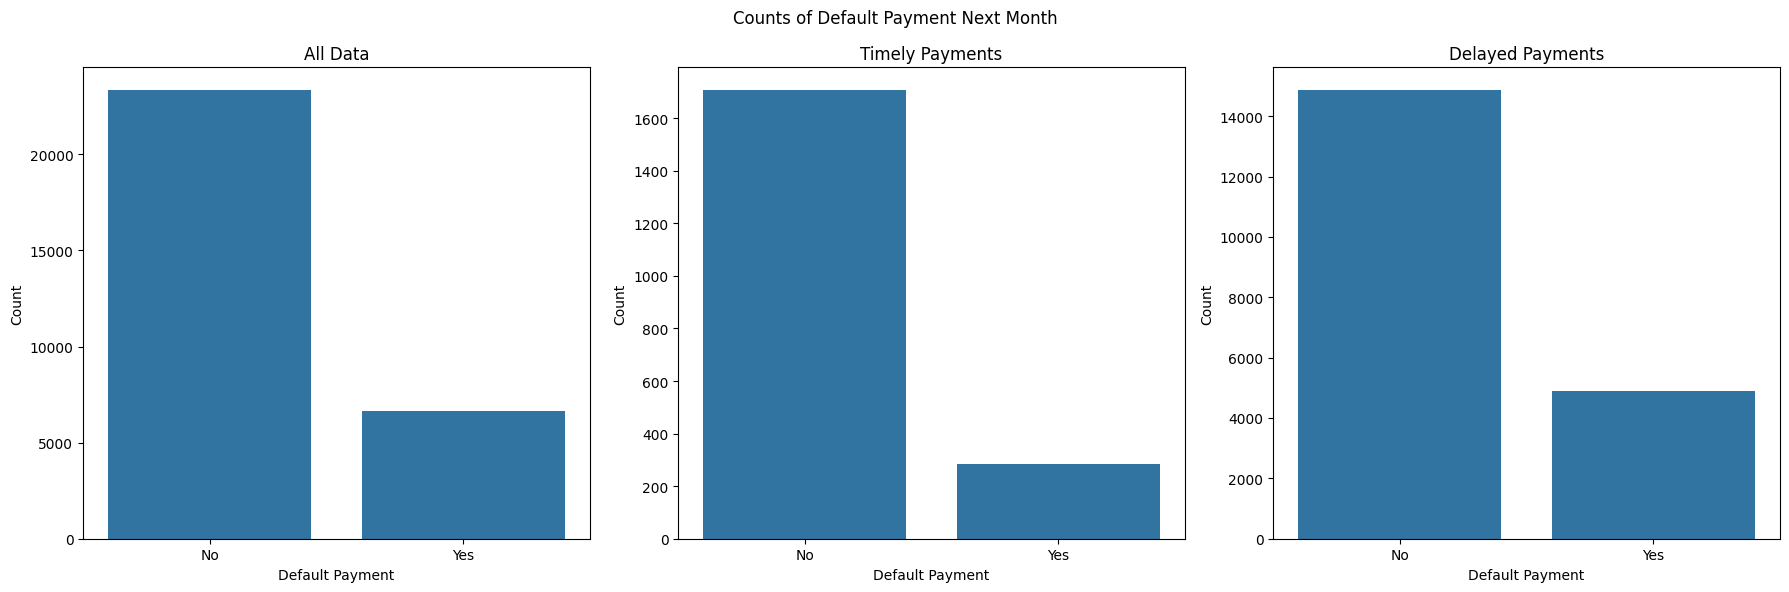

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='default payment next month', data=df, ax=axes[0])
axes[0].set_title('All Data')
axes[0].set_xlabel('Default Payment')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
sns.countplot(x='default payment next month', data=df1, ax=axes[1])
axes[1].set_title('Timely Payments')
axes[1].set_xlabel('Default Payment')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
sns.countplot(x='default payment next month', data=df2, ax=axes[2])
axes[2].set_title('Delayed Payments')
axes[2].set_xlabel('Default Payment')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No', 'Yes'])
plt.suptitle('Counts of Default Payment Next Month')
plt.tight_layout()
plt.show()

Visualization of Default Payment Counts by Payment Status

This highlights a lower default rate among clients who made timely payments compared to those with delayed payments, emphasizing the significance of payment punctuality in credit risk management.

Age Distribution

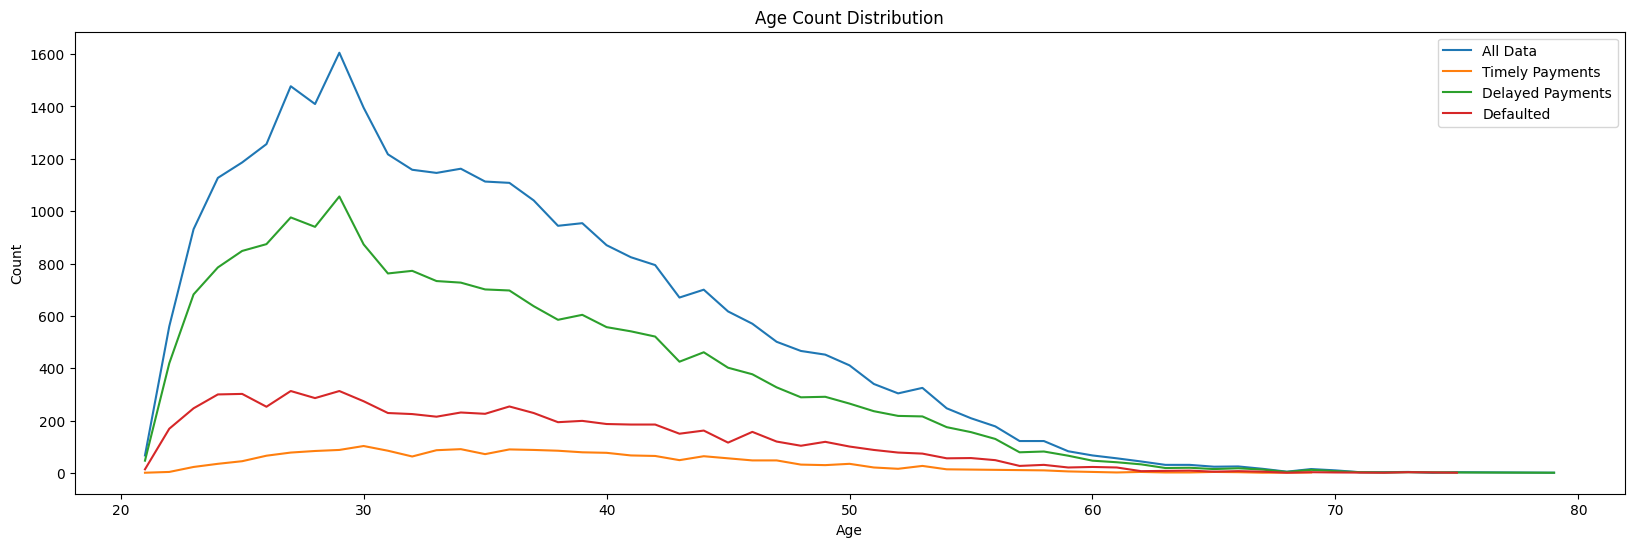

In [14]:
plt.figure(figsize=(20, 6))
# Age value counts for whole data
sns.lineplot(data=df['AGE'].value_counts(), label='All Data')
# Age value counts for timely payments
sns.lineplot(data=df1['AGE'].value_counts(), label='Timely Payments')
# Age value counts for delayed payments
sns.lineplot(data=df2['AGE'].value_counts(), label='Delayed Payments')
# Age value counts for defaulted
sns.lineplot(data=df[df['default payment next month'] == 1]['AGE'].value_counts(), label='Defaulted')
plt.title('Age Count Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

This graph reveals that we mostly have data for age group beween their late 20s and mid 40s.
It can also be observed that most defaulters and clients who have consistently delayed in payements are in the age of 20-30.

**Gender Count**

In [15]:
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


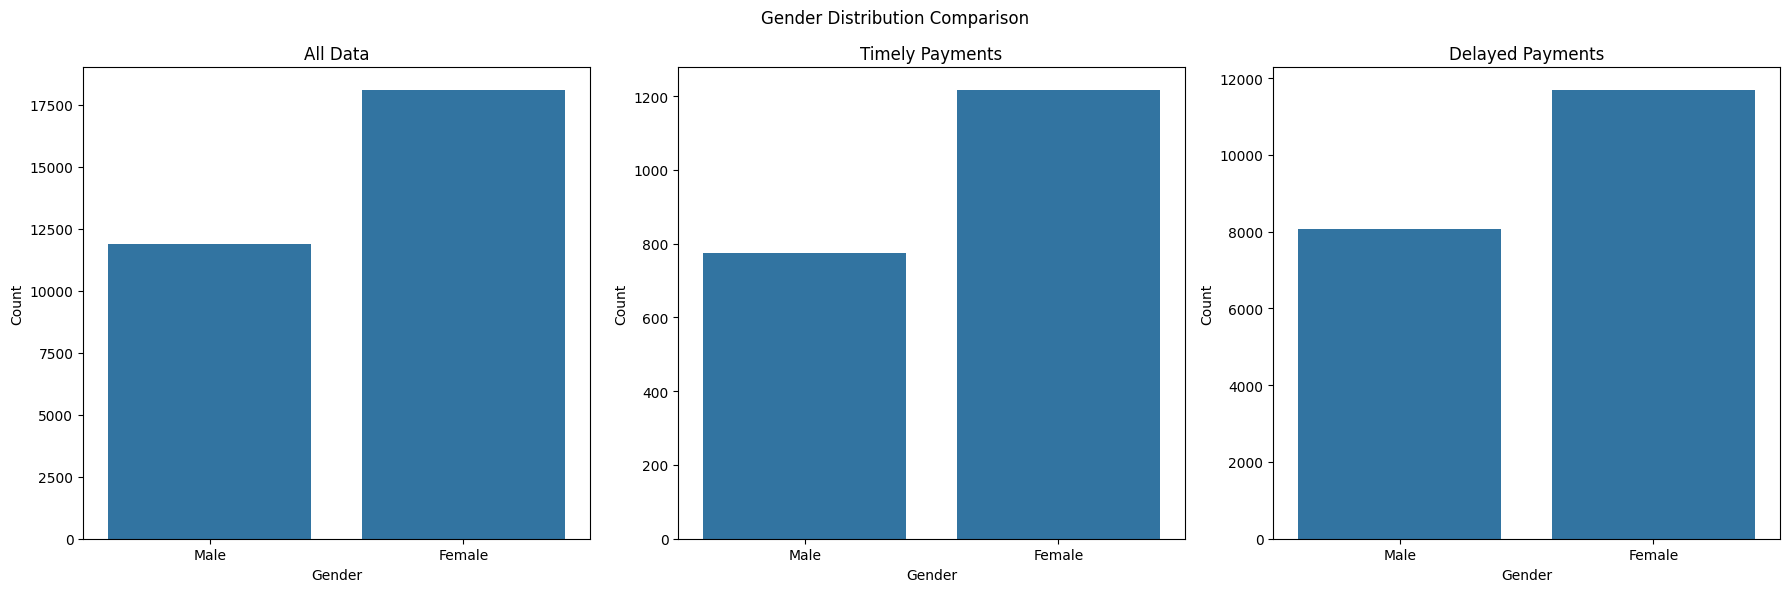

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='SEX', data=df, ax=axes[0])
axes[0].set_title('All Data')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

sns.countplot(x='SEX', data=df1, ax=axes[1])
axes[1].set_title('Timely Payments')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Male', 'Female'])

sns.countplot(x='SEX', data=df2, ax=axes[2])
axes[2].set_title('Delayed Payments')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Male', 'Female'])
plt.suptitle('Gender Distribution Comparison')
plt.tight_layout()
plt.show()

**This analysis reveals that the dataset comprises more females than males. It can also be observed that althought females have equal distribution between doing timely payments or not, more percentage of males are likely to have delayed payment**.

Education Level

In [17]:
print(df['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [18]:
# 0,5,6 shouldn't be there for education
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0),'EDUCATION'] = 4
print(df['EDUCATION'].value_counts())
df1.loc[(df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0),'EDUCATION'] = 4
print(df1['EDUCATION'].value_counts())
df2.loc[(df2.EDUCATION == 5) | (df2.EDUCATION == 6) | (df2.EDUCATION == 0),'EDUCATION'] = 4
print(df2['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64
EDUCATION
1    1005
2     706
3     258
4      23
Name: count, dtype: int64
EDUCATION
2    9953
1    6064
3    3438
4     317
Name: count, dtype: int64


<ipython-input-18-30bd6b49adbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[(df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0),'EDUCATION'] = 4
<ipython-input-18-30bd6b49adbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2.EDUCATION == 5) | (df2.EDUCATION == 6) | (df2.EDUCATION == 0),'EDUCATION'] = 4


**The education feature in our dataset contains numerical values such as 0, 5, and 6, which do not correspond to valid educational categories. To rectify this inconsistency, these values were replaced with 4, representing a more appropriate category.**

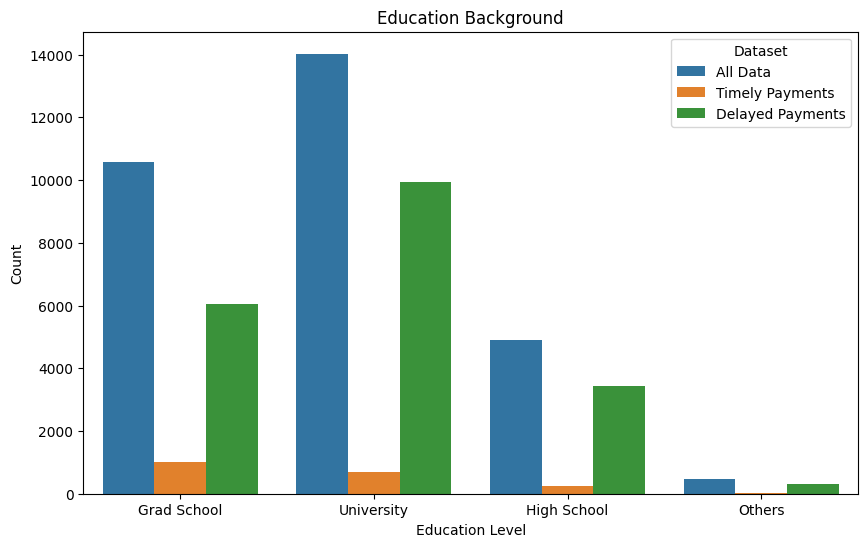

In [19]:
combined_df = pd.concat([df.assign(Dataset='All Data'), df1.assign(Dataset='Timely Payments'), df2.assign(Dataset='Delayed Payments')])
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', hue='Dataset', data=combined_df)
plt.title('Education Background')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Grad School', 'University', 'High School', 'Others'])
plt.legend(title='Dataset')
plt.show()

**It indicates that individuals with university education form the largest proportion across all datasets, while those with graduate school education are the next most common. However individuals categorized as "Others" (level 4) have the highest percentage of delayed payments compared to other education levels.**

Maratial Status

In [20]:
print(df['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [21]:
# 0 shouldn't be there for marraige
df.loc[(df.MARRIAGE == 0),'MARRIAGE'] = 3
print(df['MARRIAGE'].value_counts())
df1.loc[(df1.MARRIAGE == 0),'MARRIAGE'] = 3
print(df1['MARRIAGE'].value_counts())
df2.loc[(df2.MARRIAGE == 0),'MARRIAGE'] = 3
print(df2['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64
MARRIAGE
1    1089
2     892
3      11
Name: count, dtype: int64
MARRIAGE
2    10583
1     8938
3      251
Name: count, dtype: int64


<ipython-input-21-ff31d070c158>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[(df1.MARRIAGE == 0),'MARRIAGE'] = 3
<ipython-input-21-ff31d070c158>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2.MARRIAGE == 0),'MARRIAGE'] = 3


**Marriage category '0' is not valid and hence replaced with category '3' that is others in the dataset**

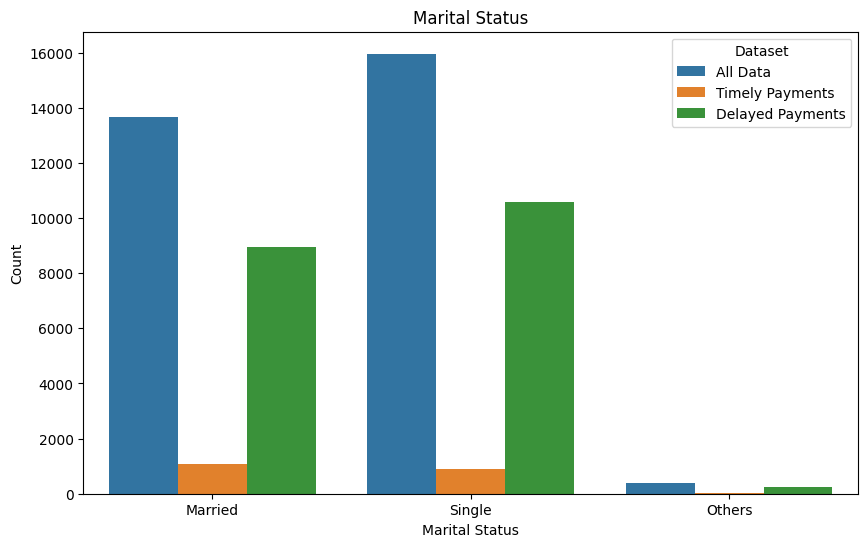

In [22]:
combined_df = pd.concat([df.assign(Dataset='All Data'), df1.assign(Dataset='Timely Payments'), df2.assign(Dataset='Delayed Payments')])
plt.figure(figsize=(10, 6))
sns.countplot(x='MARRIAGE', hue='Dataset', data=combined_df)
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Married','Single','Others'])
plt.legend(title='Dataset')
plt.show()

Marriage category 1 (Married) appears to have higher proportion of delayed payments compared to timely payments, with approximately 65.42% of clients paying late. This suggests that individuals who are married may be more prone to delaying their credit card payments.
Further analysis could explore potential reasons behind this trend, such as financial responsibilities shared within a household or differing spending habits between married and unmarried individuals.

Delays in payment

In [23]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [24]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.Series.value_counts)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


In [25]:
df[(df['PAY_0'] == -2)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
33,34,500000,2,2,1,54,-2,-2,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,35,500000,1,1,1,58,-2,-2,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178,3180,0,5293,768,0
45,46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29946,29947,230000,1,1,2,44,-2,-1,-1,-1,-1,-1,5419,3288,806,1467,9192,4388,3306,806,1500,9216,4388,0,0
29961,29962,260000,1,1,2,33,-2,-2,-2,-2,-2,-2,0,263,0,1368,101,955,263,0,1368,101,955,0,0
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
29983,29984,20000,1,2,1,44,-2,-2,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720,2890,9263,1824,1701,0


In [26]:
df[(df['PAY_0'] == 0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,29991,140000,1,2,1,41,0,0,0,0,0,0,138325,137142,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,0,0,3042,1427,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


It was observed that -2 indicates that the balance was paid in full, and there were no transactions during this period, implying that the credit card account was inactive.
0 signifies that the customer paid the minimum due amount but did not settle the entire balance. This means the customer paid enough to maintain their account in good standing but did carry forward a balance.

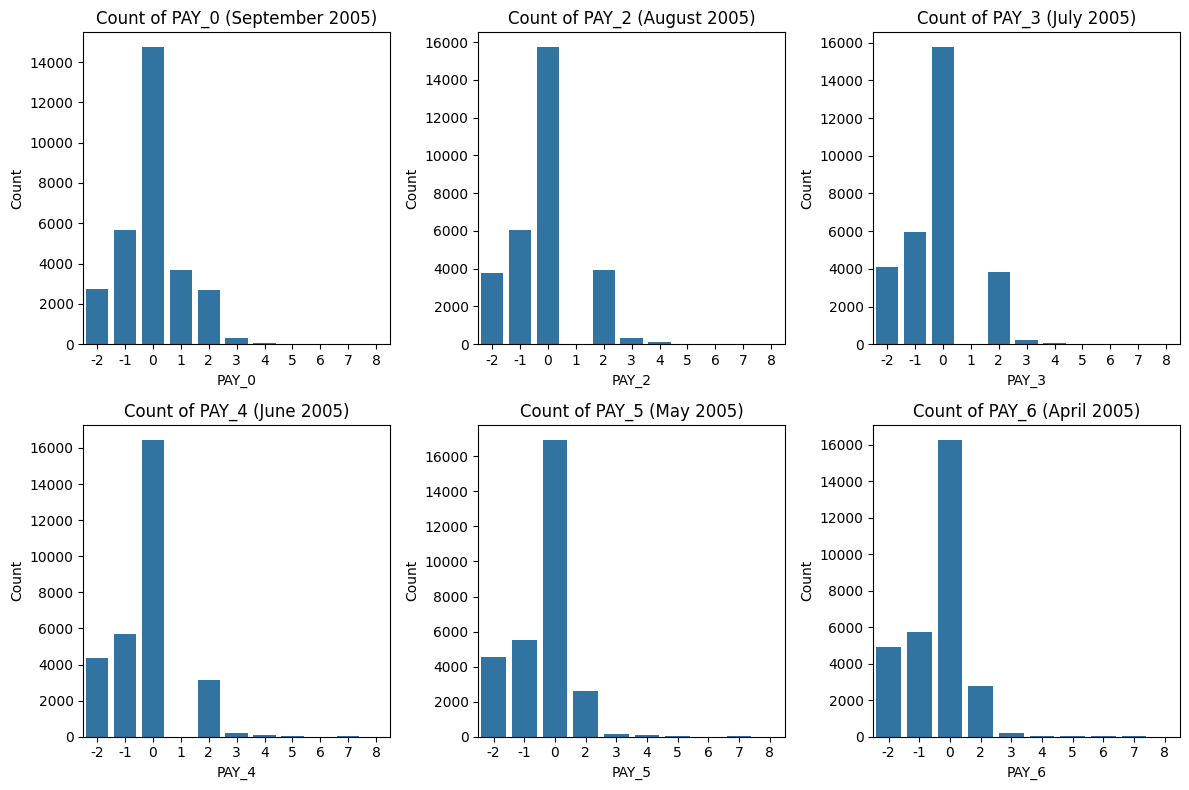

In [27]:
delay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
delay_month = ['September 2005', 'August 2005', 'July 2005', 'June 2005', 'May 2005', 'April 2005']

plt.figure(figsize=(12, 8))
for i, col in enumerate(delay, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col} ({delay_month[i-1]})')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Bill amount over months (Sept 2005 to April 2005)

In [28]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Let us assume -ve is credit in account

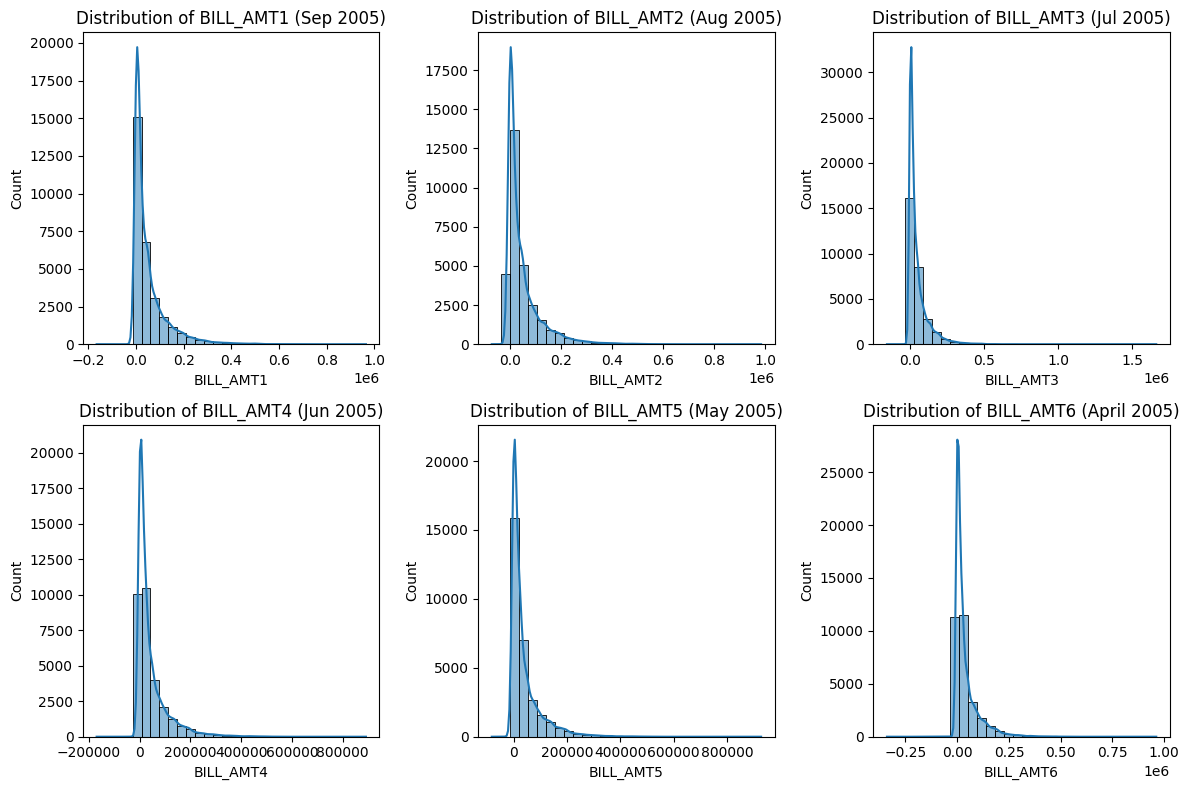

In [29]:
bill_col = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_month = ['Sep 2005', 'Aug 2005', 'Jul 2005', 'Jun 2005', 'May 2005', 'April 2005']

plt.figure(figsize=(12, 8))
for i, col in enumerate(bill_col, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} ({bill_month[i-1]})')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [30]:
data = {
    'Bill Month': bill_month,
    'Bill Amount (mean)': [df[col].mean() for col in bill_col],
    'Bill Amount (median)': [df[col].median() for col in bill_col],
    'Bill Amount (std)': [df[col].std() for col in bill_col]
}
payment_summary_df = pd.DataFrame(data)
payment_summary_df

,Bill Month,Bill Amount (mean),Bill Amount (median),Bill Amount (std)
0,Sep 2005,51223.330900,22381.5,73635.860576
1,Aug 2005,49179.075167,21200.0,71173.768783
2,Jul 2005,47013.154800,20088.5,69349.387427
3,Jun 2005,43262.948967,19052.0,64332.856134
4,May 2005,40311.400967,18104.5,60797.155770
5,April 2005,38871.760400,17071.0,59554.107537




**Paid amount over months (Sept 2005 to April 2005)**

In [31]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


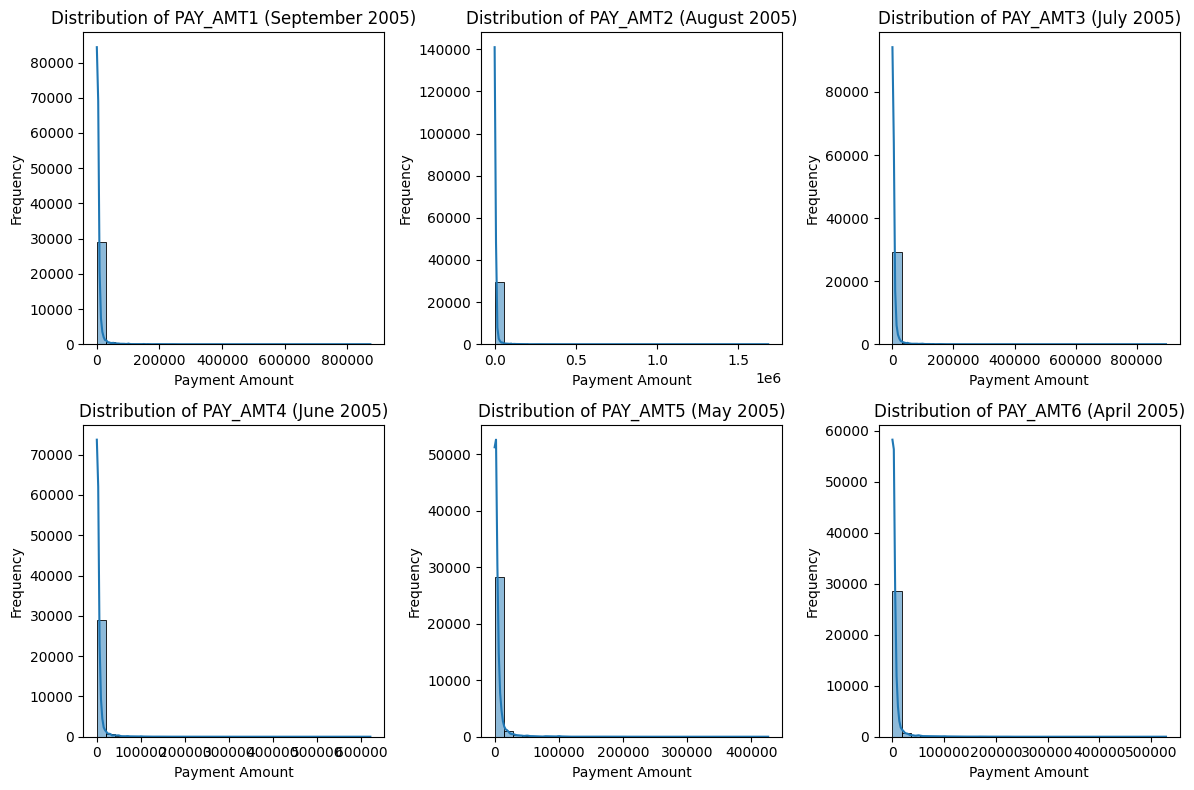

In [32]:
paid_col = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
payment_month = ['September 2005', 'August 2005', 'July 2005', 'June 2005', 'May 2005', 'April 2005']
plt.figure(figsize=(12, 8))
for i, col in enumerate(paid_col, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} ({payment_month[i-1]})')
    plt.xlabel('Payment Amount')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [33]:
data = {
    'Payment Month': payment_month,
    'Payment Amount (mean)': [df[col].mean() for col in paid_col],
    'Payment Amount (median)': [df[col].median() for col in paid_col],
    'Payment Amount (std)': [df[col].std() for col in paid_col]
}
payment_summary_df = pd.DataFrame(data)
payment_summary_df

,Payment Month,Payment Amount (mean),Payment Amount (median),Payment Amount (std)
0,September 2005,5663.580500,2100.0,16563.280354
1,August 2005,5921.163500,2009.0,23040.870402
2,July 2005,5225.681500,1800.0,17606.961470
3,June 2005,4826.076867,1500.0,15666.159744
4,May 2005,4799.387633,1500.0,15278.305679
5,April 2005,5215.502567,1500.0,17777.465775


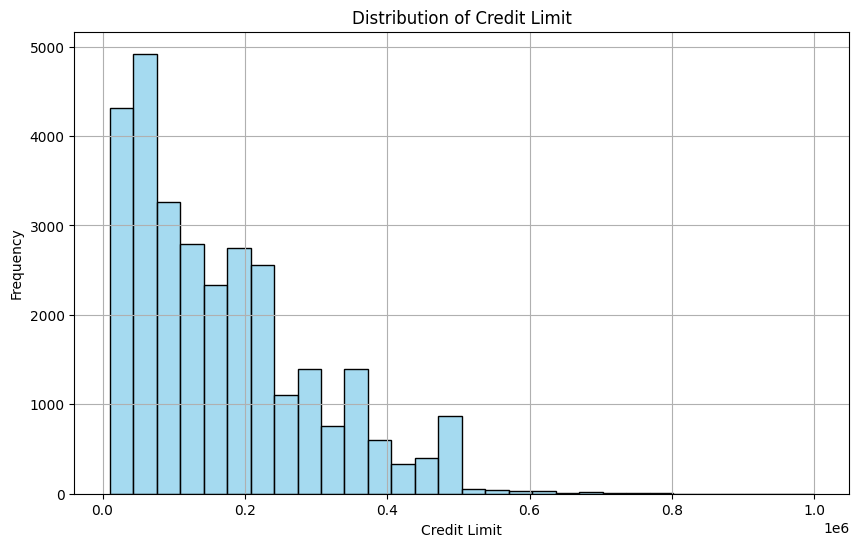

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(df['LIMIT_BAL'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Credit Limit')

plt.xlabel('Credit Limit')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

## Corelations

**Gender & Default Payment**

In [35]:
df_gender_y = df.groupby(['SEX','default payment next month']).size()
# default payment next month : response variable (Yes = 1, No = 0)
# SEX : Gender (1 = male; 2 = female)
print(df_gender_y)
p_sex = df_gender_y.groupby(['SEX'],group_keys=False).apply(lambda x: 100 * x / float(x.sum()))
print(p_sex)

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
dtype: int64
SEX  default payment next month
1    0                             75.832773
     1                             24.167227
2    0                             79.223719
     1                             20.776281
dtype: float64


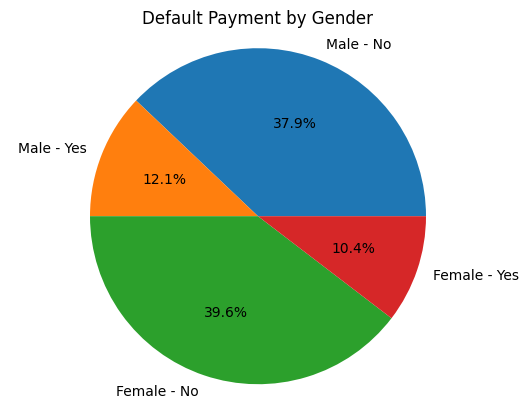

In [36]:
labels = ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes']
plt.pie(p_sex.values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Default Payment by Gender')
plt.show()

**The analysis reveals that females have a slightly lower default rate compared to males, indicating potential gender-based differences in credit risk.**

**Education vs Default Payment**

In [37]:
df_education_y = df.groupby(['EDUCATION', 'default payment next month']).size()
print(df_education_y)
# EDUCATION : 1 = graduate school; 2 = university; 3 = high school; 4 = others
p_education = df_education_y.groupby('EDUCATION',group_keys=False).apply(lambda x: 100 * x / float(x.sum()))
print(p_education)

EDUCATION  default payment next month
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               435
           1                                33
dtype: int64
EDUCATION  default payment next month
1          0                             80.765234
           1                             19.234766
2          0                             76.265146
           1                             23.734854
3          0                             74.842384
           1                             25.157616
4          0                             92.948718
           1                              7.051282
dtype: float64


**Its observed that distribution is slightly correlated on gender. Males are more likely to default next month**

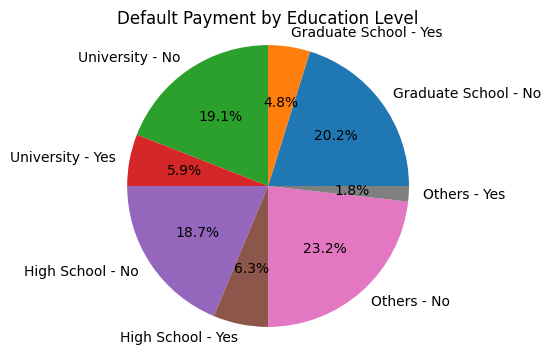

In [38]:
labels = ['Graduate School - No', 'Graduate School - Yes','University - No', 'University - Yes',
                    'High School - No', 'High School - Yes','Others - No', 'Others - Yes']
plt.figure(figsize=(4, 4))
plt.pie(p_education.values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Default Payment by Education Level')
plt.show()

**The data suggests that individuals with higher education levels tend to have lower default rates, with the default rate decreasing as education level increases. This highlights the potential correlation between education level and credit worthiness.**

Outlier Analysis

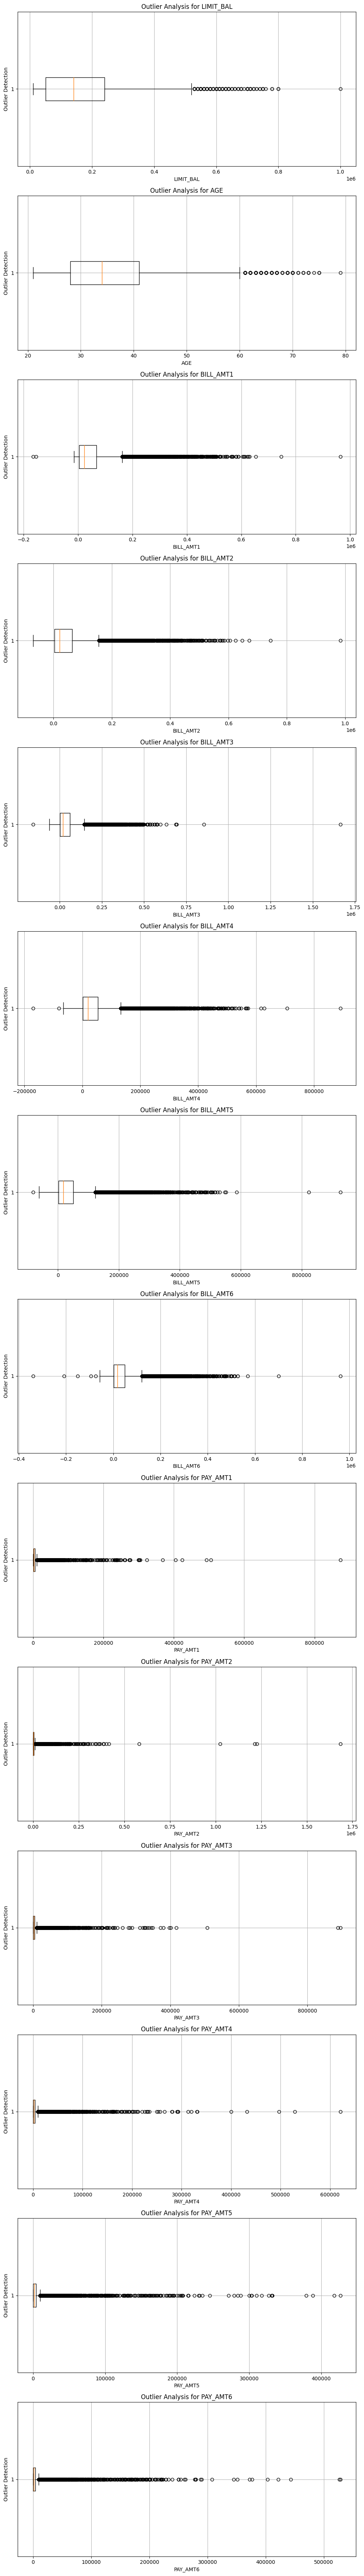

In [39]:
def outliers_plot(df, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, len(columns)*5))

    for i, column in enumerate(columns):
        ax = axes[i] if len(columns) > 1 else axes
        ax.boxplot(df[column], vert=False)
        ax.set_title(f'Outlier Analysis for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Outlier Detection')
        ax.grid(True)

    plt.tight_layout()
    plt.show()


columns_to_analyze = ['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2' ,'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
outliers_plot(df, columns_to_analyze)

# Correlation Matrix

<Figure size 1200x1000 with 0 Axes>

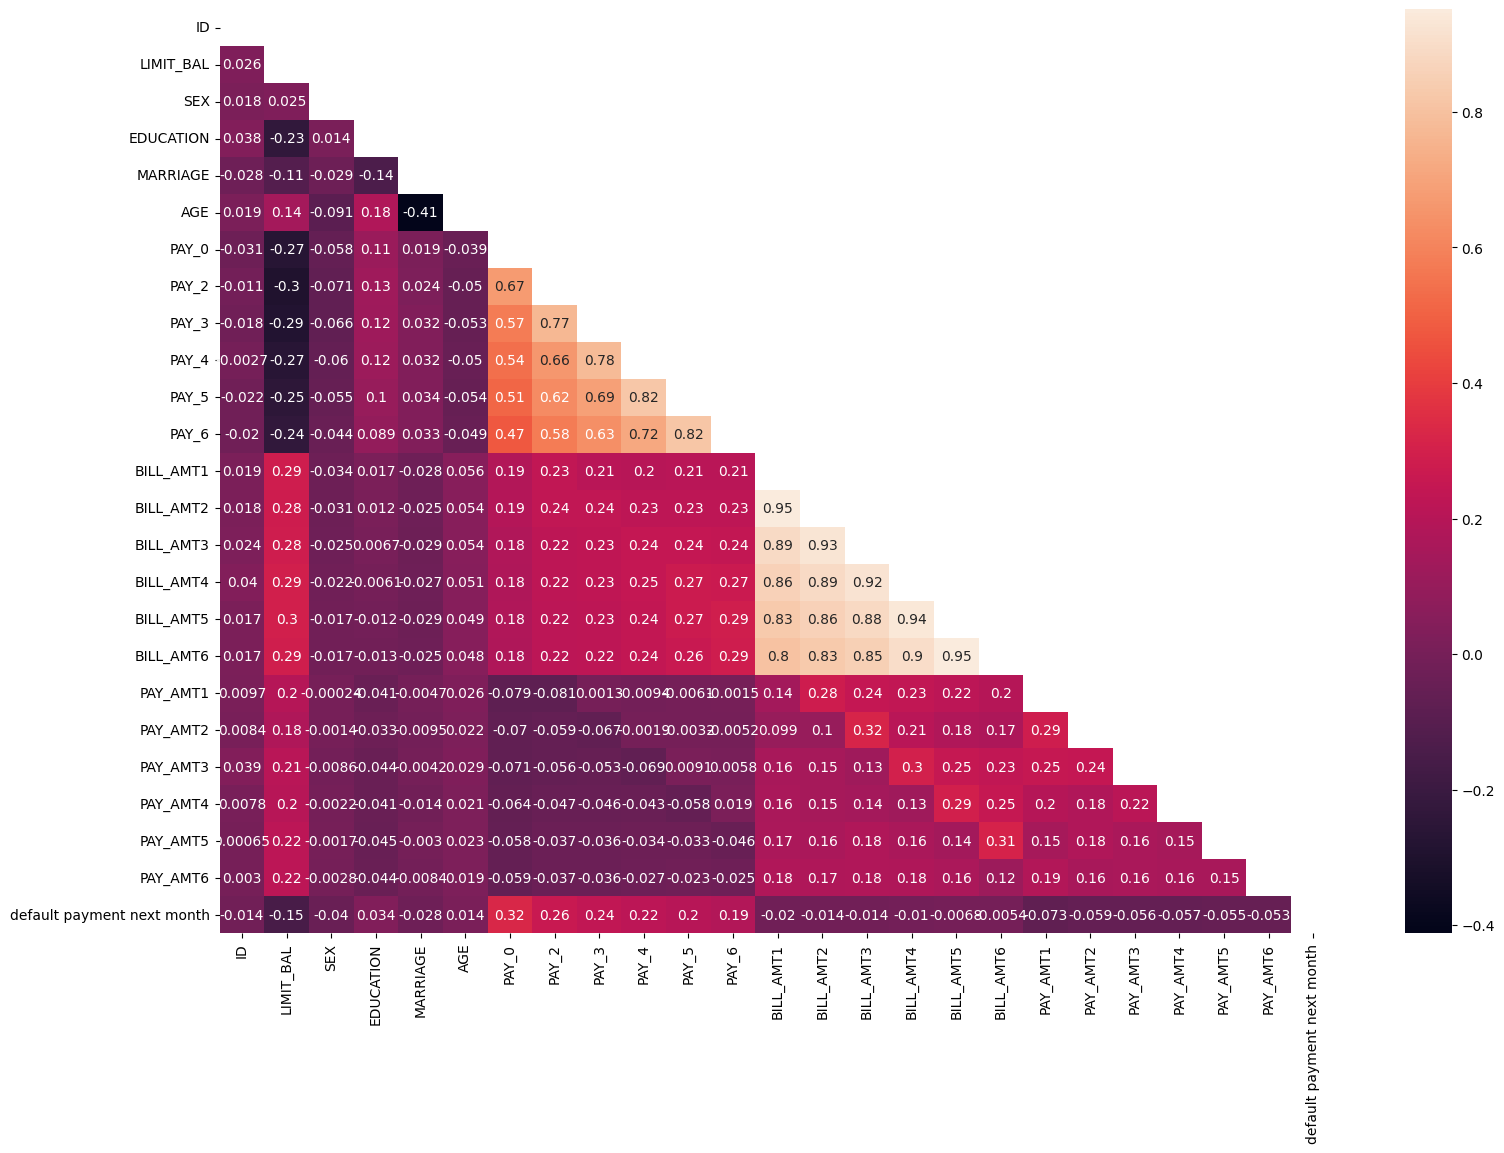

In [40]:
corr = df[df.columns].corr()
plt.figure(figsize=(12, 10))
mask=np.triu(np.ones_like(corr, dtype=bool)) # to hide the lower triangle (including diagonal) of the correlation matrix.
plt.figure(figsize=(18, 12))
sns.heatmap(corr, mask=mask, annot=True, annot_kws={'size': 10})
plt.show()

The above code generates a lower triangular correlation matrix
Each cell denotes the correlation coefficient between two variables, where one variable corresponds to the row index and the other variable corresponds to the column index. The diagonal of the correlation matrix always consists of correlation coefficients of 1.0, indicating perfect correlation, as each variable is perfectly correlated with itself. Correlation is a statistical tool used to quantify the strength and direction of the relationship between two variables. It measures how much the variables change together. The correlation coefficient, denoted by

r, it varies between -1 and 1.



 r=1 : Represents a perfect positive correlation, where both variables increase together.
r
=
−
1
: Signifies a perfect negative correlation, where one variable increases as the other decreases.
r
=
0
: Indicates no correlation, suggesting no linear relationship between the variables.


Standardisation

In [41]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [43]:
df = df.drop('ID', axis=1)

In [44]:
categorical_data=df[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']]

In [45]:
continuous_data = df[['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2' ,'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
print(continuous_data)

       LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0          20000   24       3913       3102        689          0          0   
1         120000   26       2682       1725       2682       3272       3455   
2          90000   34      29239      14027      13559      14331      14948   
3          50000   37      46990      48233      49291      28314      28959   
4          50000   57       8617       5670      35835      20940      19146   
...          ...  ...        ...        ...        ...        ...        ...   
29995     220000   39     188948     192815     208365      88004      31237   
29996     150000   43       1683       1828       3502       8979       5190   
29997      30000   37       3565       3356       2758      20878      20582   
29998      80000   41      -1645      78379      76304      52774      11855   
29999      50000   46      47929      48905      49764      36535      32428   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  P

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(continuous_data)

In [47]:
X_standardized_df= pd.DataFrame(X_standardized, columns=continuous_data.columns)

In [ ]:
X_standardized_df.head()

In [49]:
df_final = pd.concat([X_standardized_df, categorical_data],axis=1)

In [50]:
for col in categorical_data.columns:
    X_standardized_df[col] = categorical_data[col].values
df_final = X_standardized_df


In [51]:
df_final

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,2,2,1,2,2,-1,-1,-2,-2,1
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,2,2,2,-1,2,0,0,0,2,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,2,2,2,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,2,2,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1,2,1,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,1,3,1,0,0,0,0,0,0,0
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,1,3,2,-1,-1,-1,-1,0,0,0
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,2,2,4,3,2,-1,0,0,1
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,3,1,1,-1,0,0,0,-1,1


**Balancing the dataset**
Using Oversample (smote)

In [52]:
# class count
class_count_0, class_count_1 = df_final['default payment next month'].value_counts()

# divie class
class_0 = df_final [df_final['default payment next month'] == 0]
class_1 =df_final[df_final['default payment next month'] == 1]

In [53]:
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (23364, 24)

class 1: (6636, 24)


In [ ]:
#class_1_over = class_1.sample(class_count_0, replace=True)

#test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
#print('class count of 1 and 0:\n', test_under['default payment next month'].value_counts())

#test_under

In [54]:
from collections import Counter

In [55]:
x = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

In [56]:
x.shape

(30000, 23)

In [57]:
x.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,2,2,1,2,2,-1,-1,-2,-2
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,2,2,2,-1,2,0,0,0,2
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,2,2,2,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,2,2,1,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1,2,1,-1,0,-1,0,0,0


In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x and y are your features and target variable respectively
X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify=y, test_size=0.3)

# Dynamically adjust k_neighbors based on the class distribution
smote = SMOTE(k_neighbors=20)

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X_train, Y_train)
print()
print('Original dataset shape:', Counter(Y_train))
print('Resampled dataset shape:', Counter(y_smote))


Original dataset shape: Counter({0: 16355, 1: 4645})
Resampled dataset shape: Counter({0: 16355, 1: 16355})


In [59]:
x_smote.shape

(32710, 23)

In [60]:
y_smote.shape

(32710,)

In [61]:
x_smote.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1.252573,-0.920561,-0.695642,-0.690983,-0.677929,-0.672497,-0.663059,-0.615211,-0.341942,-0.256990,-0.296801,-0.308063,-0.167913,-0.237130,2,2,1,-2,-2,-2,-2,-2,-1
1,0.635981,-0.269643,0.342076,0.433382,0.532657,0.682152,0.836889,0.929393,-0.040064,-0.039980,-0.012818,0.011102,-0.052323,-0.012122,1,1,2,0,0,0,0,0,0
2,-0.905498,0.272789,-0.270516,-0.220592,-0.178752,-0.117018,-0.051934,-0.008258,-0.160815,-0.170186,-0.183208,-0.180397,-0.183229,-0.180878,1,3,1,0,0,0,0,0,0
3,0.713055,-0.703588,1.885671,2.024163,1.953919,2.210852,2.593480,4.642817,0.071450,0.040140,0.168136,0.968596,-0.314136,0.269137,1,2,2,0,0,0,0,0,2
4,0.096463,-0.161156,-0.446927,-0.429225,-0.402132,-0.471368,-0.548923,-0.594977,-0.221191,-0.170186,-0.237619,-0.308063,-0.314136,-0.282638,2,2,2,0,0,0,0,0,0


**Implementation of PCA**

In [62]:
class PCA:
    def __init__(self, explained_variance_threshold=0.95):
        self.explained_variance_threshold = explained_variance_threshold
        self.n_components = None
        self.components = None
        self.mean = None

    def fit(self, X):
        # Compute mean of each feature
        self.mean = np.mean(X, axis=0)
        # Center the data
        X -= self.mean
        # Compute covariance matrix
        cov_matrix = np.cov(X.T)
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        # Calculate explained variance ratio
        explained_variance_ratio = np.cumsum(eigenvalues[idxs]) / np.sum(eigenvalues)
        # Determine number of components to retain explained variance
        self.n_components = np.argmax(explained_variance_ratio >= self.explained_variance_threshold) + 1
        # Store the first n_components eigenvectors as principal components
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Project data onto the principal components
        X -= self.mean
        return np.dot(X, self.components.T)

    def inverse_transform(self, X_transformed):
        # Transform data back to the original space
        return np.dot(X_transformed, self.components) + self.mean

In [63]:
# Apply PCA to the oversampled data with 95% explained variance threshold
pca = PCA(explained_variance_threshold=0.95)
pca.fit(x_smote)

# Transform the oversampled data onto the new lower-dimensional space
X_train_transformed = pca.transform(x_smote)
X_test_transformed = pca.transform(X_test)

In [64]:
X_train_transformed.shape

(32710, 15)

MODEL IMPLEMENTATION ON OVERSAMPLED DATA


*   Logistic Regression



In [65]:
# Implementation of Logistic Regression with regularization and hyperparameter tuning

class LogisticRegressionWithRegularization:
    def __init__(self, learning_rate=0.01, num_iterations=3000, lambda_param=0.01, regularization=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_param = lambda_param
        self.regularization = regularization
        self.weights = None
        self.bias = None

    def sigmoid(self, z):                      #sigmoid
        return 1 / (1 + np.exp(-z))

    def _compute_regularization_term(self):
        if self.regularization == 'ridge':
            return self.lambda_param * np.sum(self.weights**2)
        elif self.regularization == 'lasso':
            return self.lambda_param * np.sum(np.abs(self.weights))
        else:
            return 0

    def predict_proba(self, X):

      linear_model = np.dot(X, self.weights) + self.bias
      return self.sigmoid(linear_model)

    def compute_loss(self, y, predictions):   # Loss calculation with regularization term

      reg_term = 0
      if self.regularization == 'ridge':
          reg_term = self.lambda_param * np.sum(self.weights**2)
      elif self.regularization == 'lasso':
          reg_term = self.lambda_param * np.sum(np.abs(self.weights))
      return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15)) + reg_term


    def fit(self, X, y, return_history=True):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        loss_history = []  # List to store the loss values

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)


            loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15)) # Compute the regular loss

            loss += self._compute_regularization_term() # Add regularization term
            if return_history:
                loss_history.append(loss)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Apply regularization
            if self.regularization == 'ridge':
                dw += 2 * self.lambda_param * self.weights
            elif self.regularization == 'lasso':
                dw += self.lambda_param * np.sign(self.weights)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        if return_history:
            return loss_history

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

In [67]:
learning_rates = [0.1, 0.01, 0.001]
lambda_params = [0.1, 0.01, 0.001]
regularizations = ['ridge', 'lasso', None]

best_accuracy = 0
best_params = {}
train_losses = []
cv_losses = []
validation_losses = []

In [68]:


for lr in learning_rates:
    for lambda_param in lambda_params:
        for regularization in regularizations:
            model = LogisticRegressionWithRegularization(learning_rate=lr, lambda_param=lambda_param, regularization=regularization)
            model.fit(X_train_transformed, y_smote)
            y_pred = model.predict(X_test_transformed)
            train_pred = model.predict_proba(X_train_transformed)
            val_pred = model.predict_proba(X_test_transformed)
            train_loss = model.compute_loss(y_smote, train_pred)
            validation_loss = model.compute_loss(Y_test, val_pred)
            train_losses.append(train_loss)
            validation_losses.append(validation_loss)
            accuracy = np.mean(y_pred == Y_test)
            print(f"Accuracy with lr={lr}, lambda={lambda_param}, regularization={regularization}  : {round(accuracy,3)}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'lambda_param': lambda_param, 'regularization': regularization}


print("Best parameters:", best_params)

Accuracy with lr=0.1, lambda=0.1, regularization=ridge  : 0.781
Accuracy with lr=0.1, lambda=0.1, regularization=lasso  : 0.63
Accuracy with lr=0.1, lambda=0.1, regularization=None  : 0.807
Accuracy with lr=0.1, lambda=0.01, regularization=ridge  : 0.804
Accuracy with lr=0.1, lambda=0.01, regularization=lasso  : 0.791
Accuracy with lr=0.1, lambda=0.01, regularization=None  : 0.807
Accuracy with lr=0.1, lambda=0.001, regularization=ridge  : 0.807
Accuracy with lr=0.1, lambda=0.001, regularization=lasso  : 0.806
Accuracy with lr=0.1, lambda=0.001, regularization=None  : 0.807
Accuracy with lr=0.01, lambda=0.1, regularization=ridge  : 0.766
Accuracy with lr=0.01, lambda=0.1, regularization=lasso  : 0.623
Accuracy with lr=0.01, lambda=0.1, regularization=None  : 0.782
Accuracy with lr=0.01, lambda=0.01, regularization=ridge  : 0.784
Accuracy with lr=0.01, lambda=0.01, regularization=lasso  : 0.757
Accuracy with lr=0.01, lambda=0.01, regularization=None  : 0.782
Accuracy with lr=0.01, lambd

In [69]:
def compute_confusion_matrix(y_true, y_pred):          #confusion matrix

    TP = TN = FP = FN = 0

    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    confusion_matrix = [
        [TN, FP],
        [FN, TP]
    ]

    return confusion_matrix, TP, TN, FP, FN

In [70]:
cm = compute_confusion_matrix(Y_test, y_pred)
print(cm)

([[4972, 2037], [820, 1171]], 1171, 4972, 2037, 820)


In [71]:
from sklearn.metrics import confusion_matrix  #Cross checking the values
cm = confusion_matrix(Y_test, y_pred)
TP, TN, FP, FN  = cm.ravel()


print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 4972
True Negatives (TN): 2037
False Positives (FP): 820
False Negatives (FN): 1171


In [114]:

def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score


precision, recall, f1_score = calculate_metrics(TP, TN, FP, FN) # Calculate Precision, Recall, F1 Score

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Precision: 0.8584
Recall: 0.8094
F1 Score: 0.8332


In [74]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(Y_test, y_pred)


print(f"ROC-AUC Score: {auc_score:.4f}") # Print the ROC-AUC Score

ROC-AUC Score: 0.6488


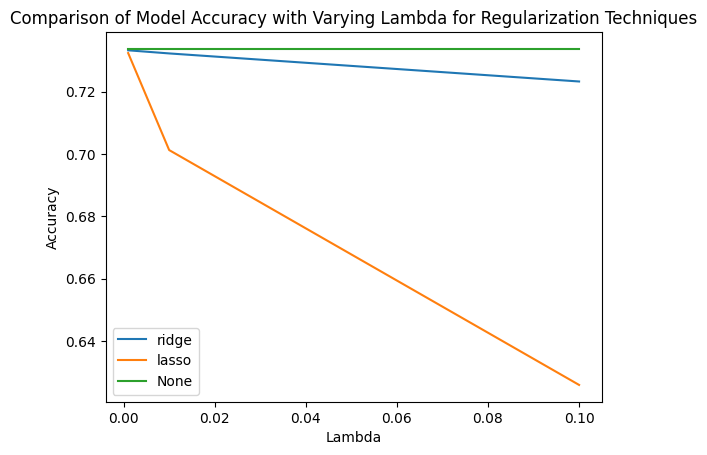

In [77]:
fig, ax = plt.subplots()
for regularization in regularizations:
    accuracies = []
    for lambda_param in lambda_params:
        model = LogisticRegressionWithRegularization(learning_rate=0.01, num_iterations=1000, lambda_param=lambda_param, regularization=regularization)
        model.fit(X_train_transformed, y_smote)
        y_pred = model.predict(X_test_transformed)
        accuracy = np.mean(y_pred == Y_test)
        accuracies.append(accuracy)
    ax.plot(lambda_params, accuracies, label=f'{regularization}')
ax.set_xlabel('Lambda')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy with Varying Lambda for Regularization Techniques')
ax.legend()
plt.show()

**Bias - Variance Trade-off**

Original dataset shape: Counter({0: 14018, 1: 3982})
Resampled dataset shape: Counter({0: 14018, 1: 14018})


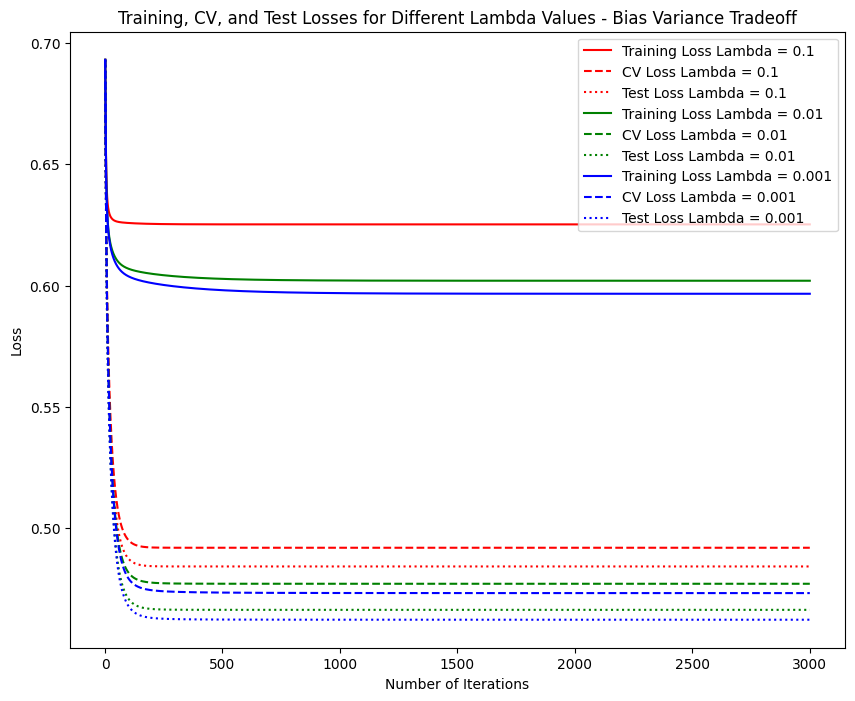

In [75]:
X_train_1, X_temp, y_train_1, y_temp = train_test_split(x, y, stratify=y, test_size=0.4, random_state=42)
X_cv_1, X_test_1, y_cv_1, y_test_1 = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42)

# Applying SMOTE to handle imbalance in the training dataset
smote = SMOTE(k_neighbors=20)
X_train_smote, y_train_smote = smote.fit_resample(X_train_1, y_train_1)

# Print the class distributions after resampling
print('Original dataset shape:', Counter(y_train_1))
print('Resampled dataset shape:', Counter(y_train_smote))

# Apply PCA to the oversampled data with 95% explained variance threshold
pca = PCA(explained_variance_threshold=0.95)
pca.fit(X_train_smote)

X_train_transformed_1 = pca.transform(X_train_smote)
X_cv_transformed_1 = pca.transform(X_cv_1)
X_test_transformed_1 = pca.transform(X_test_1)


from sklearn.metrics import accuracy_score

lambdas = [0.1, 0.01, 0.001]  # Varying regularization strengths
learning_rate = 0.1  # Use an optimal or constant learning rate
regularization_type = 'ridge'  # Choose from 'ridge', 'lasso'
train_errors = []
test_errors = []
cv_errors = []

plt.figure(figsize=(10, 8))

colors = ['r', 'g', 'b']
labels = ['Lambda = 0.1', 'Lambda = 0.01', 'Lambda = 0.001']

for lambda_param, color, label in zip(lambdas, colors, labels):
    model = LogisticRegressionWithRegularization(learning_rate=learning_rate, lambda_param=lambda_param, regularization=regularization_type)
    training_loss = model.fit(X_train_transformed_1, y_train_smote, return_history=True)
    cv_loss = model.fit(X_cv_transformed_1, y_cv_1, return_history=True)
    test_loss = model.fit(X_test_transformed_1, y_test_1, return_history=True)

    y_pred_train = model.predict(X_train_transformed_1)
    y_pred_val = model.predict(X_test_transformed_1)
    cv_pred = model.predict(X_cv_transformed_1)

    train_error = 1 - accuracy_score(y_train_smote, y_pred_train)
    val_error = 1 - accuracy_score(y_test_1, y_pred_val)
    cv_error = 1 - accuracy_score(y_cv_1, cv_pred)

    # Plotting
    plt.plot(range(1, model.num_iterations + 1), training_loss, color=color, linestyle='-', label=f'Training Loss {label}')
    plt.plot(range(1, model.num_iterations + 1), cv_loss, color=color, linestyle='--', label=f'CV Loss {label}')
    plt.plot(range(1, model.num_iterations + 1), test_loss, color=color, linestyle=':', label=f'Test Loss {label}')


# Final plot adjustments
plt.title('Training, CV, and Test Losses for Different Lambda Values - Bias Variance Tradeoff')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


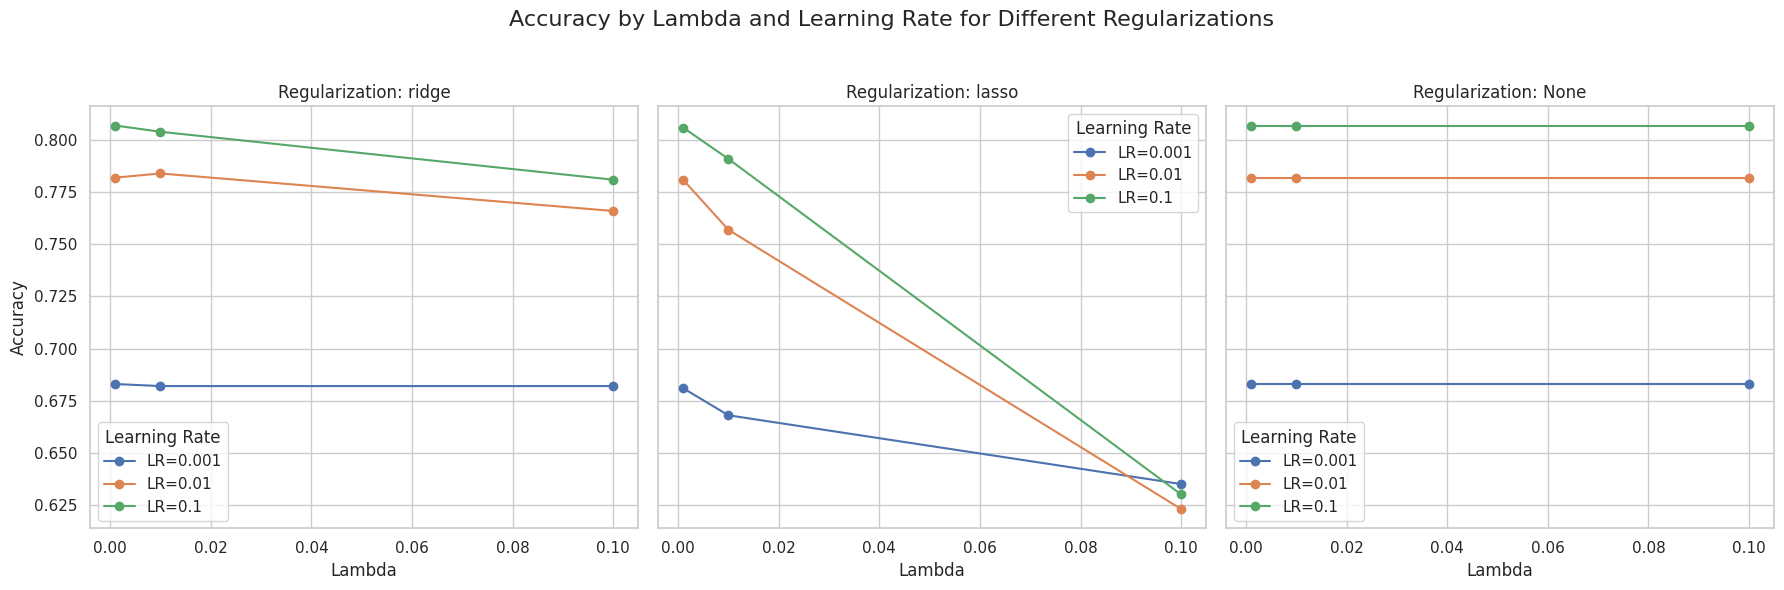

In [101]:

sns.set(style="whitegrid")

# Data setup
data = {
    'Learning Rate': [0.1]*9 + [0.01]*9 + [0.001]*9,
    'Lambda': [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001]*3,
    'Regularization': ['ridge', 'lasso', 'None', 'ridge', 'lasso', 'None', 'ridge', 'lasso', 'None']*3,
    'Accuracy': [
        0.781, 0.63, 0.807, 0.804, 0.791, 0.807, 0.807, 0.806, 0.807,
        0.766, 0.623, 0.782, 0.784, 0.757, 0.782, 0.782, 0.781, 0.782,
        0.682, 0.635, 0.683, 0.682, 0.668, 0.683, 0.683, 0.681, 0.683
    ]
}


df = pd.DataFrame(data)


pivot_df = df.pivot_table(values='Accuracy', index='Lambda', columns=['Learning Rate', 'Regularization'], aggfunc='first')
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Accuracy by Lambda and Learning Rate for Different Regularizations', fontsize=16)

# Plot each regularization method in a different subplot
for ax, reg in zip(axes, ['ridge', 'lasso', 'None']):
    for lr in pivot_df.columns.levels[1]:
        pivot_df[reg][lr].plot(ax=ax, marker='o', label=f'LR={lr}')
    ax.set_title(f'Regularization: {reg}')
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Accuracy')
    ax.legend(title='Learning Rate')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


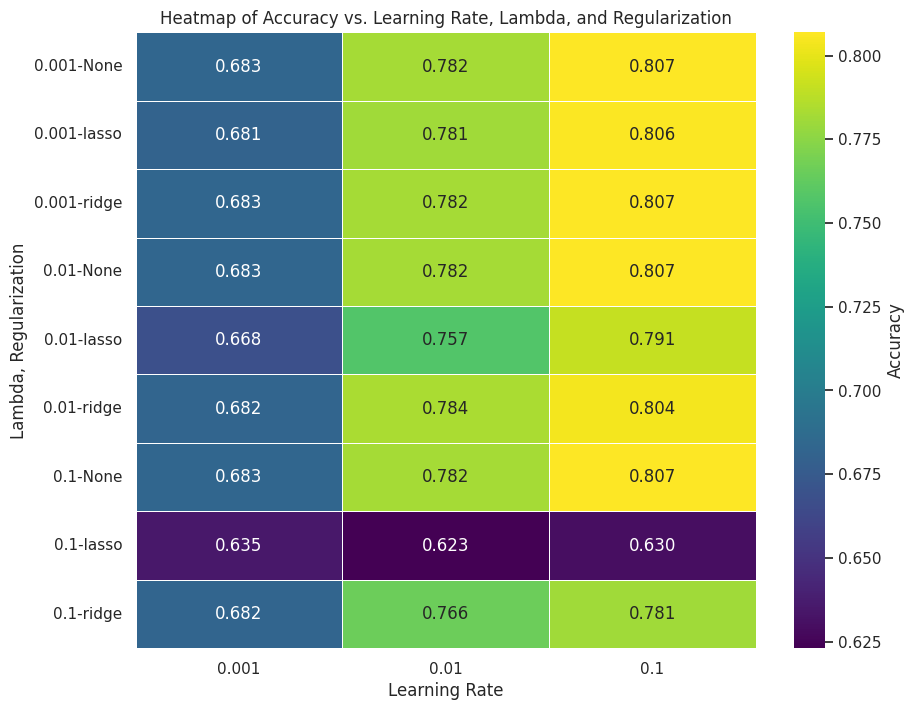

In [102]:

# Data setup
data = {
    'Learning Rate': [0.1]*9 + [0.01]*9 + [0.001]*9,
    'Lambda': [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001]*3,
    'Regularization': ['ridge', 'lasso', 'None', 'ridge', 'lasso', 'None', 'ridge', 'lasso', 'None']*3,
    'Accuracy': [
        0.781, 0.63, 0.807, 0.804, 0.791, 0.807, 0.807, 0.806, 0.807,
        0.766, 0.623, 0.782, 0.784, 0.757, 0.782, 0.782, 0.781, 0.782,
        0.682, 0.635, 0.683, 0.682, 0.668, 0.683, 0.683, 0.681, 0.683
    ]
}


df = pd.DataFrame(data)


pivot_df = df.pivot_table(values='Accuracy', index=['Lambda', 'Regularization'], columns='Learning Rate', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Accuracy'})
plt.title('Heatmap of Accuracy vs. Learning Rate, Lambda, and Regularization')
plt.xlabel('Learning Rate')
plt.ylabel('Lambda, Regularization')
plt.show()


In [78]:
print("Best parameters:", best_params)
best_model = LogisticRegressionWithRegularization(learning_rate=best_params['learning_rate'],
                                                  lambda_param=best_params['lambda_param'],
                                                  regularization=best_params['regularization'])

Best parameters: {'learning_rate': 0.1, 'lambda_param': 0.1, 'regularization': None}


Observations:The accuracy levels for the dataset that has been balanced using SMOTE and trained using logistic regression
are generally higher

*Scenerio -2 *

**LOGISTIC REGRESSION FOR UNDERSAMPLED DATA**

In [81]:
df_final.shape

(30000, 24)

In [82]:
df_final.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,2,2,1,2,2,-1,-1,-2,-2,1
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,2,2,2,-1,2,0,0,0,2,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,2,2,2,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,2,2,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1,2,1,-1,0,-1,0,0,0,0


In [83]:
x_for_undersampled= df_final.iloc[:, :-1]
y_for_undersampled= df_final.iloc[:, -1]

In [84]:
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [85]:
#split the dataset
X_undersample_train, X_undersample_test, Y_undersample_train, Y_undersample_test = train_test_split(x_for_undersampled, y_for_undersampled, test_size=0.3)

In [86]:
X_undersample_train.shape

(21000, 23)

In [87]:
X_undersample_test.shape

(9000, 23)

**Under-Sampling**

In [88]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X_undersample_train,Y_undersample_train)

print('original dataset shape:', Counter(Y_undersample_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 16343, 1: 4657})
Resample dataset shape Counter({0: 4657, 1: 4657})


PCA IMPLEMENTATION

In [89]:
class PCA:
    def __init__(self, explained_variance_threshold=0.95):
        self.explained_variance_threshold = explained_variance_threshold
        self.n_components = None
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)

        X -= self.mean

        cov_matrix = np.cov(X.T) #  covariance matrix

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]

        explained_variance_ratio = np.cumsum(eigenvalues[idxs]) / np.sum(eigenvalues)
        # Determine number of components to retain explained variance
        self.n_components = np.argmax(explained_variance_ratio >= self.explained_variance_threshold) + 1
        # Store the first n_components eigenvectors as principal components
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):

        X -= self.mean
        return np.dot(X, self.components.T) # Project data onto the principal components

    def inverse_transform(self, X_transformed):

        return np.dot(X_transformed, self.components) + self.mean # Transform data back to the original space

In [90]:
# Apply PCA to the oversampled data with 95% explained variance threshold
pca = PCA(explained_variance_threshold=0.95)
pca.fit(x_rus)


X_train_undersample_transformed = pca.transform(x_rus)
X_test_undersample_transformed = pca.transform(X_undersample_test)

In [91]:
X_train_undersample_transformed.shape

(9314, 15)

In [92]:
X_test_undersample_transformed.shape

(9000, 15)

In [93]:
best_accuracy_rus = 0
best_params_rus = {}


In [95]:
for lr in learning_rates:
    for lambda_param in lambda_params:
        for regularization in regularizations:
            model = LogisticRegressionWithRegularization(learning_rate=lr, lambda_param=lambda_param, regularization=regularization)
            model.fit(X_train_undersample_transformed,y_rus)
            y_pred_rus = model.predict(X_test_undersample_transformed)
            accuracy_rus = np.mean(y_pred_rus == Y_undersample_test)
            print(f"Accuracy with lr={lr}, lambda={lambda_param}, regularization={regularization}  : {round(accuracy_rus,3)}")
            if accuracy_rus > best_accuracy_rus:
                best_accuracy = accuracy_rus
                best_params_rus = {'learning_rate': lr, 'lambda_param': lambda_param, 'regularization': regularization}

print("Best parameters:", best_params_rus)

Accuracy with lr=0.1, lambda=0.1, regularization=ridge  : 0.651
Accuracy with lr=0.1, lambda=0.1, regularization=lasso  : 0.62
Accuracy with lr=0.1, lambda=0.1, regularization=None  : 0.699
Accuracy with lr=0.1, lambda=0.01, regularization=ridge  : 0.687
Accuracy with lr=0.1, lambda=0.01, regularization=lasso  : 0.604
Accuracy with lr=0.1, lambda=0.01, regularization=None  : 0.699
Accuracy with lr=0.1, lambda=0.001, regularization=ridge  : 0.698
Accuracy with lr=0.1, lambda=0.001, regularization=lasso  : 0.696
Accuracy with lr=0.1, lambda=0.001, regularization=None  : 0.699
Accuracy with lr=0.01, lambda=0.1, regularization=ridge  : 0.657
Accuracy with lr=0.01, lambda=0.1, regularization=lasso  : 0.617
Accuracy with lr=0.01, lambda=0.1, regularization=None  : 0.688
Accuracy with lr=0.01, lambda=0.01, regularization=ridge  : 0.681
Accuracy with lr=0.01, lambda=0.01, regularization=lasso  : 0.632
Accuracy with lr=0.01, lambda=0.01, regularization=None  : 0.688
Accuracy with lr=0.01, lambd

In [96]:
def compute_confusion_matrix(y_true, y_pred):
    """
    Manually compute the confusion matrix for binary classification.

    Args:
    y_true (list or array): Actual true class labels.
    y_pred (list or array): Predicted class labels.

    Returns:
    tuple: (confusion_matrix, TP, TN, FP, FN)
    """
    TP = TN = FP = FN = 0

    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    confusion_matrix = [
        [TN, FP],
        [FN, TP]
    ]

    return confusion_matrix, TP, TN, FP, FN

In [97]:
cm_rus = confusion_matrix(Y_undersample_test, y_pred_rus)

In [109]:
TN_rus, FP_rus, FN_rus, TP_rus = cm.ravel()

# Display the confusion matrix and the individual components with formatted strings
print(f"True Positives (TP): {TP_rus}")
print(f"True Negatives (TN): {TN_rus}")
print(f"False Positives (FP): {FP_rus}")
print(f"False Negatives (FN): {FN_rus}")

True Positives (TP): 1171
True Negatives (TN): 4972
False Positives (FP): 2037
False Negatives (FN): 820


In [112]:
# Calculate Precision, Recall, F1 Score
precision_rus = TP_rus / (TP_rus + FP_rus)
recall_rus = TP_rus / (TP_rus + FN_rus)

f1_score_rus = 2 * (precision_rus * recall_rus) / (precision_rus + recall_rus)
print(f"Precision: {precision_rus:.4f}")
print(f"Recall: {recall_rus:.4f}")
print(f"F1 Score: {f1_score_rus:.4f}")


Precision: 0.3650
Recall: 0.5881
F1 Score: 0.4505


In [116]:
from sklearn.metrics import roc_auc_score

auc_score_rus = roc_auc_score(Y_undersample_test, y_pred_rus)


print(f"ROC-AUC Score: {auc_score_rus:.4f}") # Print the ROC-AUC Score

ROC-AUC Score: 0.6588


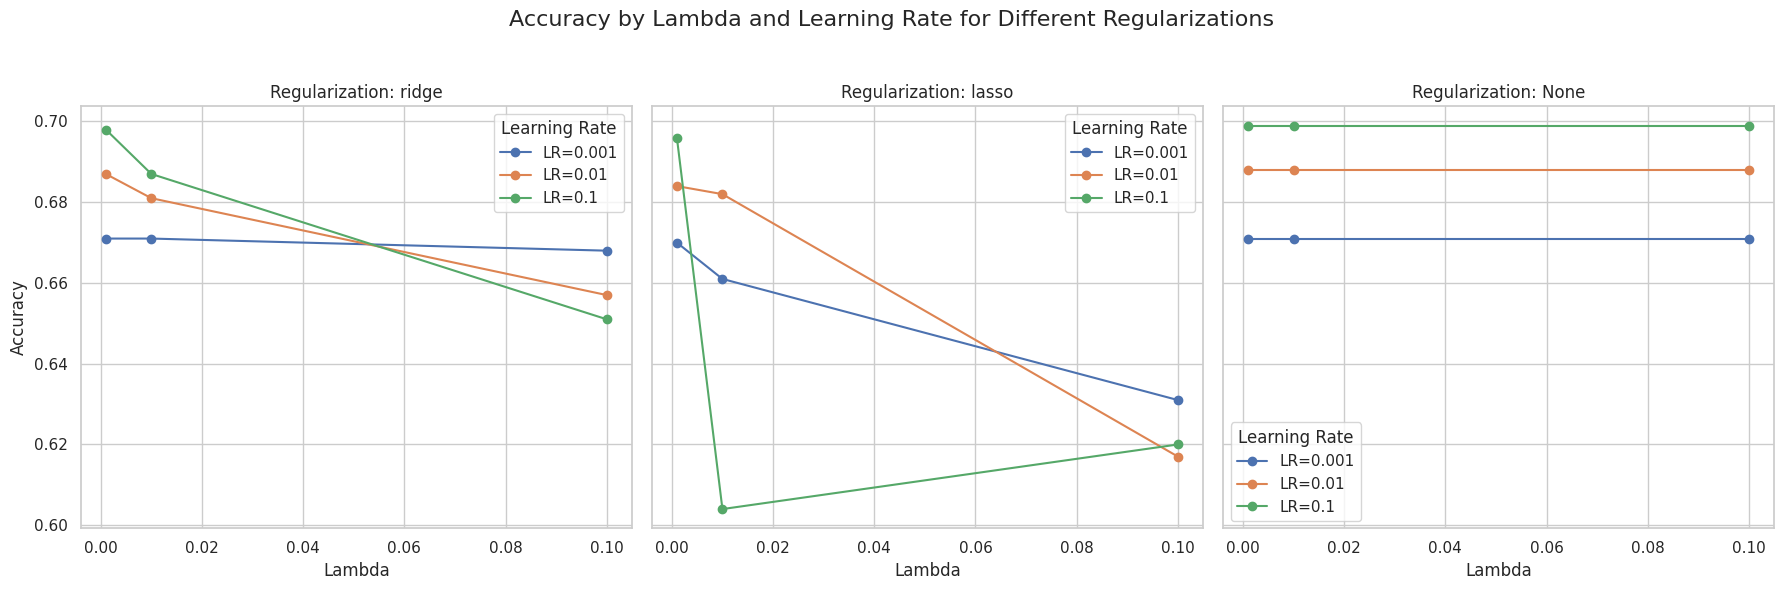

In [103]:

sns.set(style="whitegrid")

# Data setup
data_rus = {
    'Learning Rate': [0.1]*9 + [0.01]*9 + [0.001]*9,
    'Lambda': [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001]*3,
    'Regularization': ['ridge', 'lasso', 'None', 'ridge', 'lasso', 'None', 'ridge', 'lasso', 'None']*3,
    'Accuracy': [
        0.651, 0.62, 0.699, 0.687, 0.604, 0.699, 0.698, 0.696, 0.699,
        0.657, 0.617, 0.688, 0.681, 0.682, 0.688, 0.687, 0.684, 0.688,
        0.668, 0.631, 0.671, 0.671, 0.661, 0.671, 0.671, 0.67, 0.671
    ]
}


df_rus = pd.DataFrame(data_rus)

pivot_df_rus = df_rus.pivot_table(values='Accuracy', index='Lambda', columns=['Learning Rate', 'Regularization'], aggfunc='first')
pivot_df_rus = pivot_df_rus.swaplevel(axis=1).sort_index(axis=1)


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Accuracy by Lambda and Learning Rate for Different Regularizations', fontsize=16)

# Plot each regularization method in a different subplot
for ax, reg in zip(axes, ['ridge', 'lasso', 'None']):
    for lr in pivot_df_rus.columns.levels[1]:
        pivot_df_rus[reg][lr].plot(ax=ax, marker='o', label=f'LR={lr}')
    ax.set_title(f'Regularization: {reg}')
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Accuracy')
    ax.legend(title='Learning Rate')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


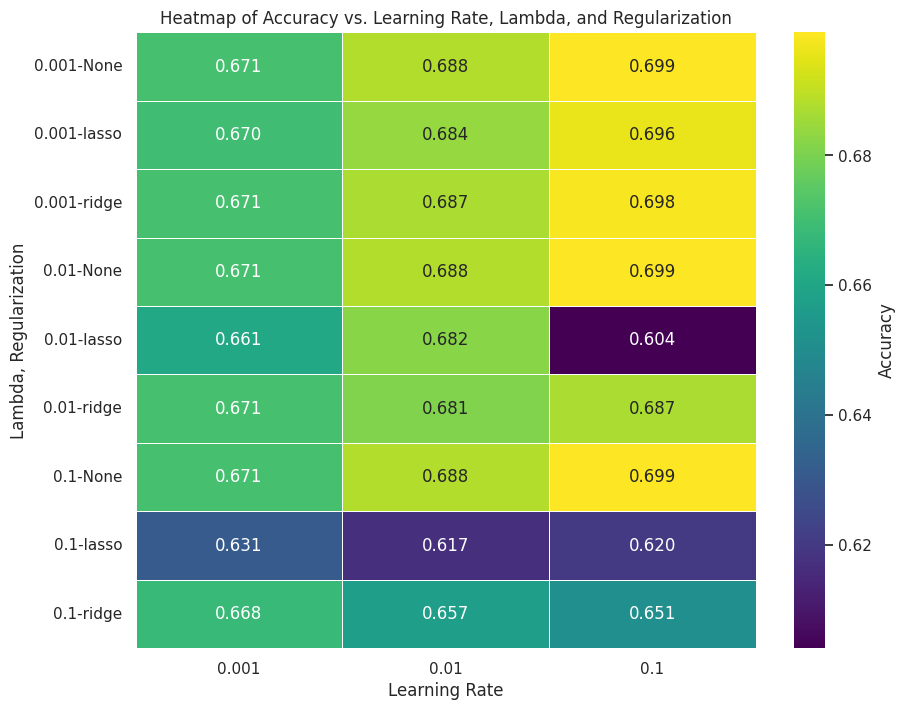

In [106]:

# Data setup
data_rus = {
    'Learning Rate': [0.1]*9 + [0.01]*9 + [0.001]*9,
    'Lambda': [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001]*3,
    'Regularization': ['ridge', 'lasso', 'None', 'ridge', 'lasso', 'None', 'ridge', 'lasso', 'None']*3,
    'Accuracy': [
        0.651, 0.62, 0.699, 0.687, 0.604, 0.699, 0.698, 0.696, 0.699,
        0.657, 0.617, 0.688, 0.681, 0.682, 0.688, 0.687, 0.684, 0.688,
        0.668, 0.631, 0.671, 0.671, 0.661, 0.671, 0.671, 0.67, 0.671
    ]
}


df_rus = pd.DataFrame(data_rus)


pivot_df_rus = df_rus.pivot_table(values='Accuracy', index=['Lambda', 'Regularization'], columns='Learning Rate', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_rus, annot=True, cmap='viridis', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Accuracy'})
plt.title('Heatmap of Accuracy vs. Learning Rate, Lambda, and Regularization')
plt.xlabel('Learning Rate')
plt.ylabel('Lambda, Regularization')
plt.show()


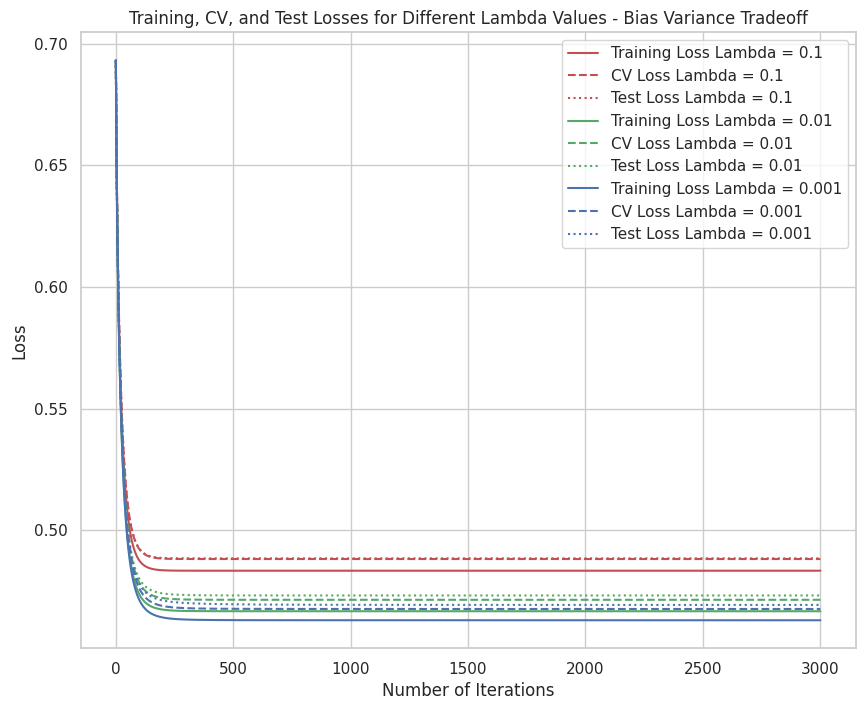

In [104]:
X_undersample_train_rus, X_undersample_temp, Y_undersample_train_rus, Y_undersample_temp = train_test_split(x_for_undersampled, y_for_undersampled, test_size=0.4)
X_undersample_cv_rus, X_undersample_test_rus, y_undersample_cv_rus, y_undersample_test_rus = train_test_split(X_undersample_temp, Y_undersample_temp, stratify=Y_undersample_temp, test_size=0.5, random_state=42)



# Apply PCA to the oversampled data with 95% explained variance threshold
pca = PCA(explained_variance_threshold=0.95)
pca.fit(X_undersample_train)

# Transform the oversampled data onto the new lower-dimensional space
X_train_undersample_transformed_1 = pca.transform(X_undersample_train_rus)
X_cv_undersample_transformed_1 = pca.transform(X_undersample_cv_rus)
X_test_undersample_transformed_1 = pca.transform(X_undersample_test_rus)


from sklearn.metrics import accuracy_score

lambdas = [0.1, 0.01, 0.001]  # Varying regularization strengths
learning_rate = 0.1  # Use an optimal or constant learning rate
regularization_type = 'ridge'  # Choose from 'ridge', 'lasso'
train_errors = []
test_errors = []
cv_errors = []

plt.figure(figsize=(10, 8))

colors = ['r', 'g', 'b']
labels = ['Lambda = 0.1', 'Lambda = 0.01', 'Lambda = 0.001']

for lambda_param, color, label in zip(lambdas, colors, labels):
    model_rus = LogisticRegressionWithRegularization(learning_rate=learning_rate, lambda_param=lambda_param, regularization=regularization_type)
    training_loss_rus = model_rus.fit(X_train_undersample_transformed_1, Y_undersample_train_rus, return_history=True)
    cv_loss_rus = model_rus.fit(X_cv_undersample_transformed_1, y_undersample_cv_rus, return_history=True)
    test_loss_rus = model_rus.fit(X_test_undersample_transformed_1, y_undersample_test_rus, return_history=True)

    y_pred_train_rus = model.predict(X_train_undersample_transformed_1)
    y_pred_val_rus = model.predict(X_test_undersample_transformed_1)
    cv_pred_rus = model.predict(X_cv_undersample_transformed_1)

    train_error_rus = 1 - accuracy_score(Y_undersample_train_rus, y_pred_train_rus)
    val_error_rus = 1 - accuracy_score(y_undersample_test_rus, y_pred_val_rus)
    cv_error_rus = 1 - accuracy_score(y_undersample_cv_rus, cv_pred_rus)

    # Plotting
    plt.plot(range(1, model.num_iterations + 1), training_loss_rus, color=color, linestyle='-', label=f'Training Loss {label}')
    plt.plot(range(1, model.num_iterations + 1), cv_loss_rus, color=color, linestyle='--', label=f'CV Loss {label}')
    plt.plot(range(1, model.num_iterations + 1), test_loss_rus, color=color, linestyle=':', label=f'Test Loss {label}')


# Final plot adjustments
plt.title('Training, CV, and Test Losses for Different Lambda Values - Bias Variance Tradeoff')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
